In [58]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

γ = 1 / 18
σ = 1 / 5.2

i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

x_0 = s_0, e_0, i_0



def F(x, t, R0=1.6):
    """
    Time derivative of the state vector.
        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant
    """
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * γ if callable(R0) else R0 * γ
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - σ * e
    di = σ * e - γ * i

    return ds, de, di



def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    #c_path = c_path * np.max(self.data_train.values.squeeze())/ np.max(c_path)
    c_path = c_path * 20/ np.max(c_path)
    return c_path




In [61]:
mode_R_list = ['ct', 'mitigation']
mode_R = mode_R_list[1]

def sir_model(x, r0, mu, r_bar):

    if mode_R == 'mitigation':
        
        def R0_mitigating(t, r0=3, mu=1, r_bar=1.6):
            R0 = r0 * np.exp(- mu * t) + (1 - np.exp(- mu * t)) * r_bar
            return R0

        R0 = lambda t: R0_mitigating(t, mu=mu)
    
    elif mode_R =='ct':
        R0 = r0
    
    #length = len(self.data_train.values.squeeze())
    length = 7
    t_vec = np.linspace(0, length, length)
    c_path = solve_path(R0, t_vec)
    
    
    return c_path

#self.sir_model = lambda x, t: sir_model(x, r0, mu, r_bar)
    
fit_model = curve_fit(sir_model, xdata = [1, 2, 3, 4, 5, 6, 7],
                      ydata = [5, 4, 5, 6, 6, 7, 8], maxfev=100000, bounds=([0,0,0],[20,20,20]))
#self.parameters_optim = fit_model[0]
parameters_optim = fit_model[0]
    
    


In [62]:
parameters_optim

array([10.        , 10.00000013, 10.        ])

In [ ]:
def R0_mitigating(t, r0=3, η=1, r_bar=1.6):
    R0 = r0 * np.exp(- η * t) + (1 - np.exp(- η * t)) * r_bar
    return R0


In [ ]:
x0 = self.parameters_trend
self.gompertz_model = lambda x, a, b, c:  c * np.exp(-b * np.exp(-(x - x0) / a))

def gompertz_model(x,a,b,c):
    return c * np.exp(-b * np.exp(-(x - x0) / a))

fit_model = curve_fit(gompertz_model, xdata = self.x_train_features[:,0].squeeze(),
                      ydata = self.data_train.values.squeeze(), maxfev=100000, bounds=([0,0,0],[10,100,150000]))
self.parameters_optim = fit_model[0]
sigma_a, sigma_b, sigma_c = np.sqrt(np.diag(fit_model[1]))

In [ ]:
#Multiplicaré por el ulimo valor de la serie temporal acumulada

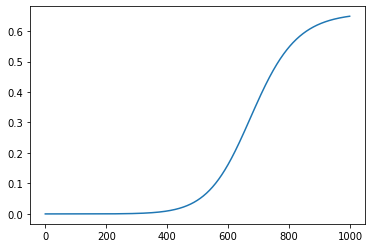

In [43]:
plt.plot(c_path)

In [ ]:
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

In [6]:

R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

In [7]:
def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left')

    plt.show()

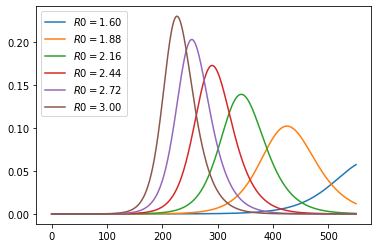

In [8]:
plot_paths(i_paths, labels)

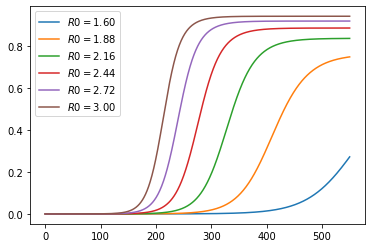

In [9]:
plot_paths(c_paths, labels)

In [44]:
a = (0, 1)

In [63]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
t_full = np.linspace(0,399,400)
a = [2, 4, 5]
b = [1, 2]

In [84]:
a[0:-1]

[2, 4]

In [81]:
a[b[0]:b[-1]]

[4]